<a href="https://colab.research.google.com/github/mghendi/opencvnoiseremoval/blob/main/Group_3_CV_Noise_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 3 OpenCV Noise Removal

## Group Members



1.   Peter Kariuki Mutuura - P52/37710/2020
2.   Josech Mayaka Nyakundi - P52/37684/2020
3.   Samuel Mwamburi Mghendi - P52/37621/2020


### OpenCV Data Types, Matrices, Images and More Programs.


**Image Noise Removal**


Gathered raw data contains noise i.e. unwanted features that make it hard to perceive during processing.

Noise, such as Gaussian noise, can be eliminated by applying a filter.


In [1]:
import cv2 as cv

In [2]:
img = cv.imread('Cat.png')

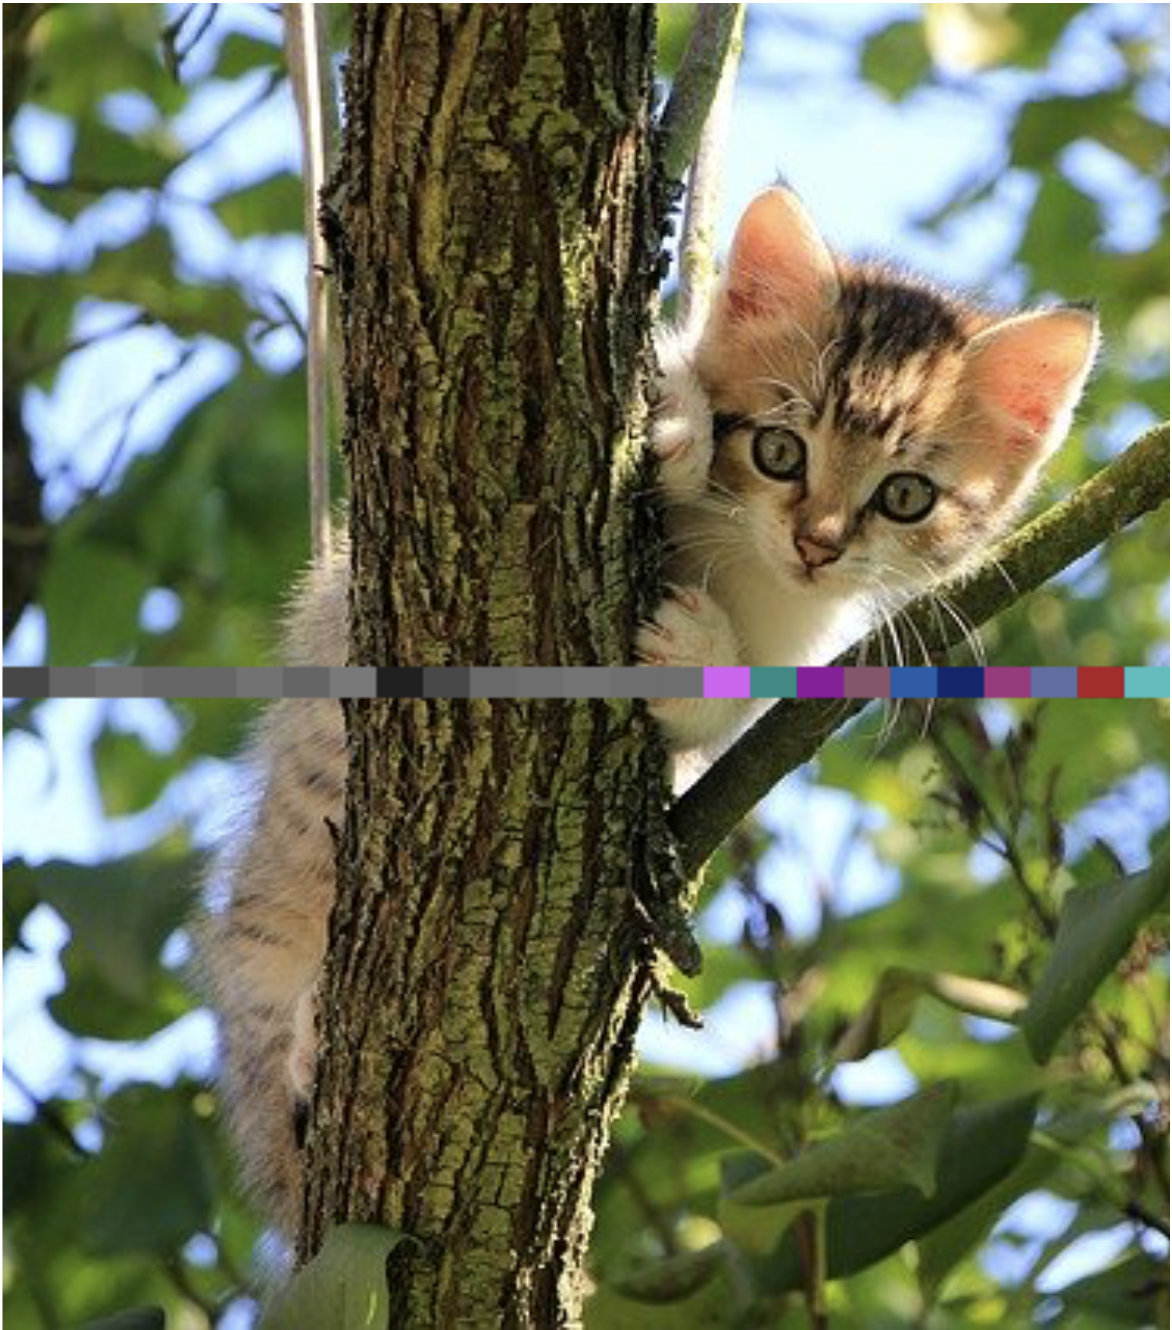

In [8]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

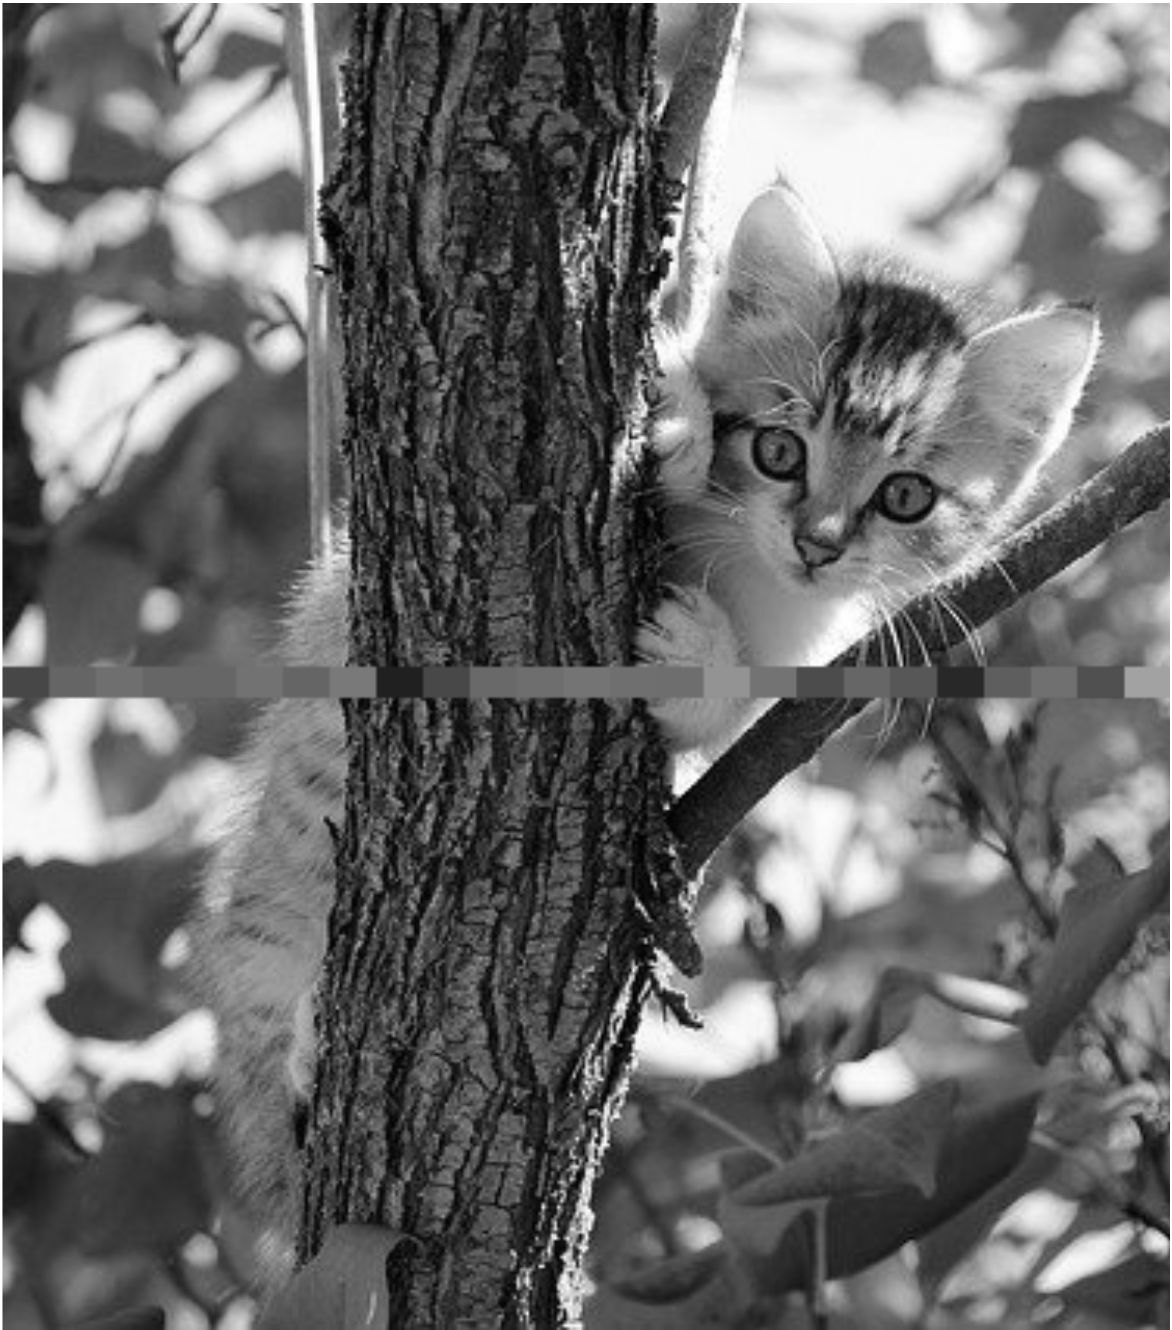

In [9]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY);
cv2_imshow(gray)

In [10]:
cv.waitKey(0)

-1

In [12]:
import numpy as np

**Adding salt & pepper noise to an image**

In [13]:
def salt_pepper(prob):
      # Extract image dimensions
      row, col = gray.shape

      # Declare salt & pepper noise ratio
      s_vs_p = 0.5
      output = np.copy(gray)

      # Apply salt noise on each pixel individually
      num_salt = np.ceil(prob * gray.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in gray.shape]
      output[coords] = 1

      # Apply pepper noise on each pixel individually
      num_pepper = np.ceil(prob * gray.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in gray.shape]
      output[coords] = 0
      cv2_imshow(output)

      return output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


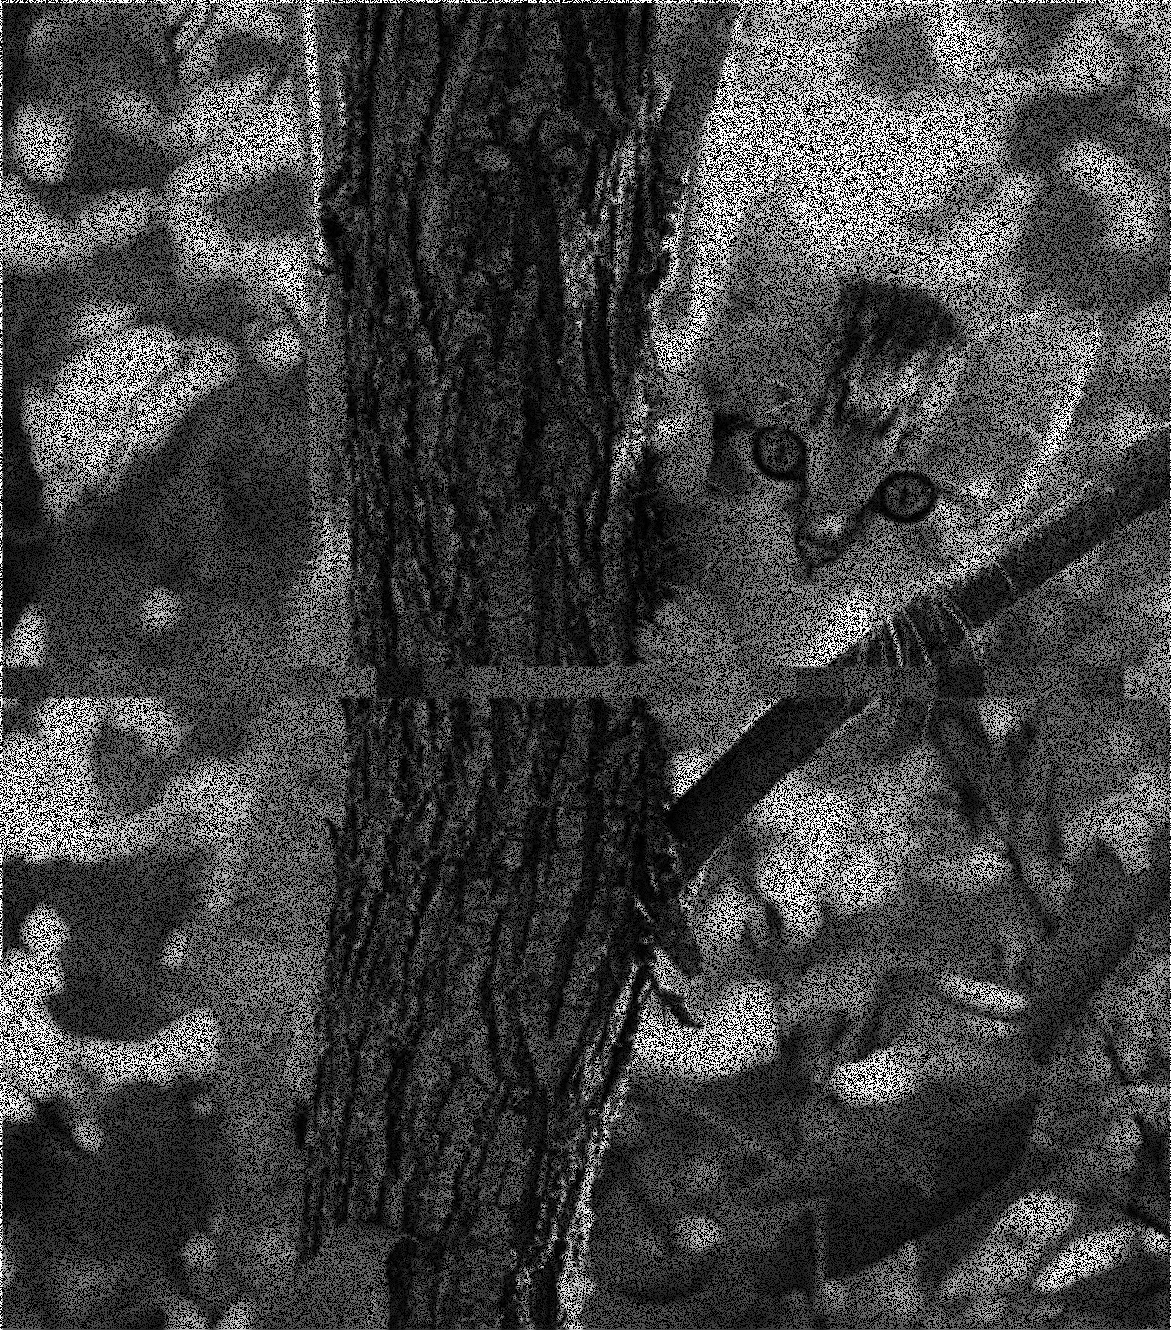

In [14]:
# Call function with probability = 0.5 on the image
sp_05 = salt_pepper(0.5)

In [18]:
cv.imwrite('catsp_05.png', sp_05)

True

**Application of Noise Reducing Filters**

1. Arithmetic Filter with Sharpening Kernel

In [19]:
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1, 9,-1],
                              [-1,-1,-1]])



--- Effects of sharpening ---




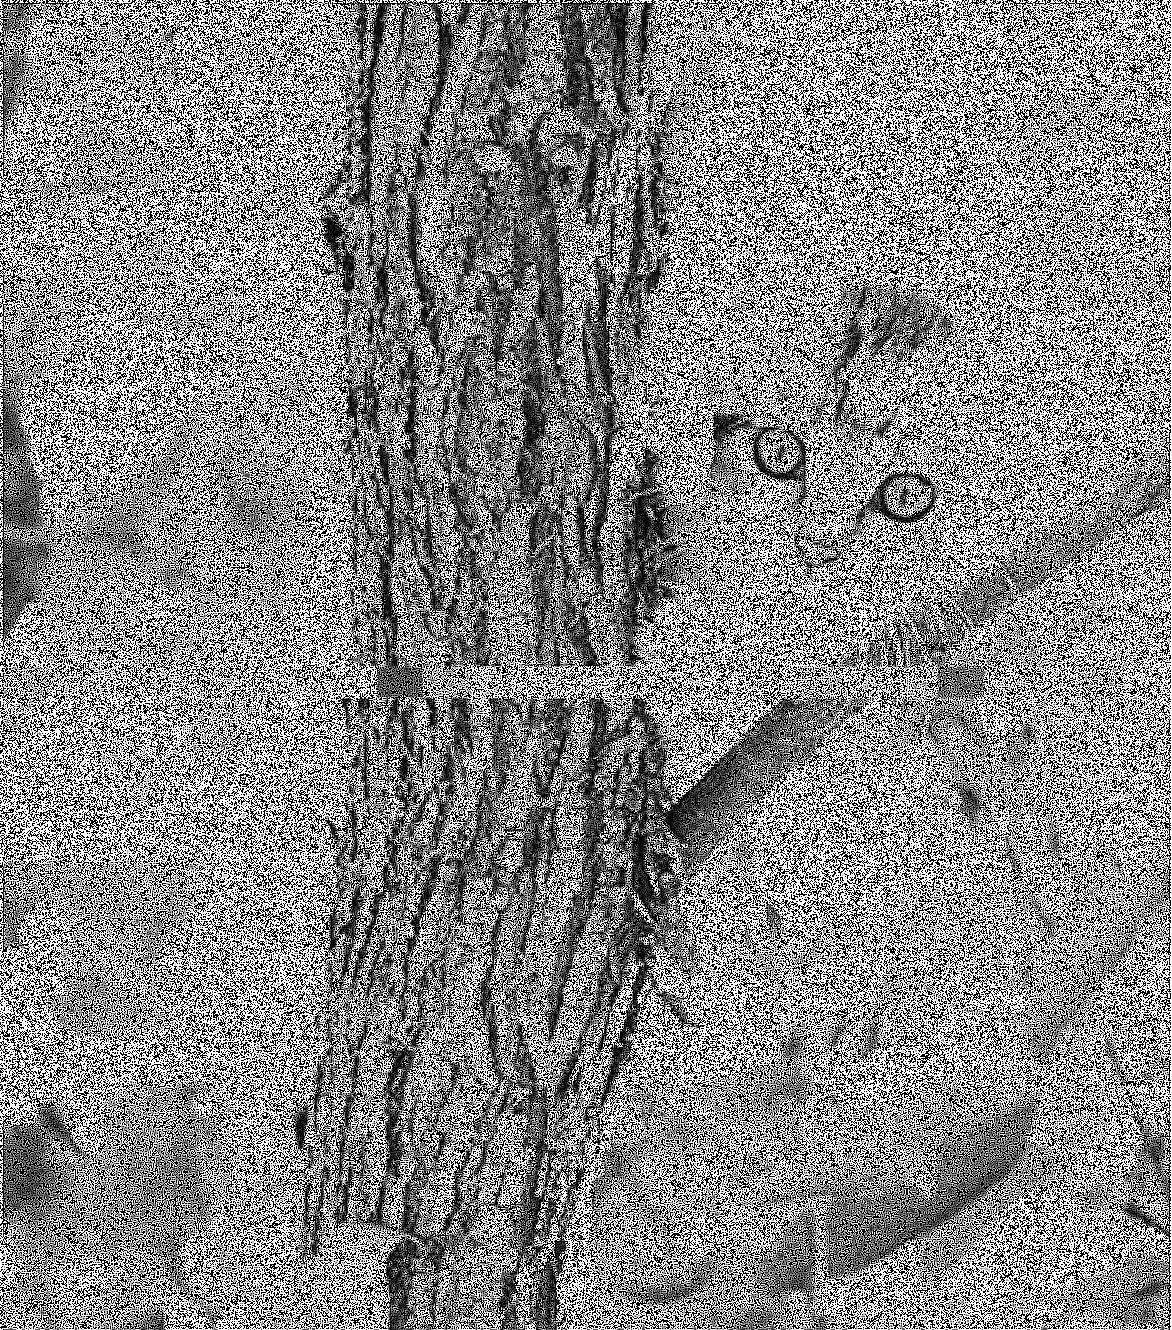

In [21]:
# Applying the sharpening kernel 
print("\n\n--- Effects of sharpening ---\n\n")
sharpened_img = cv.filter2D(sp_05, -1, kernel_sharpening)
cv2_imshow(sharpened_img)

2. Midpoint Filter



---Effects of Midpoint Filter---




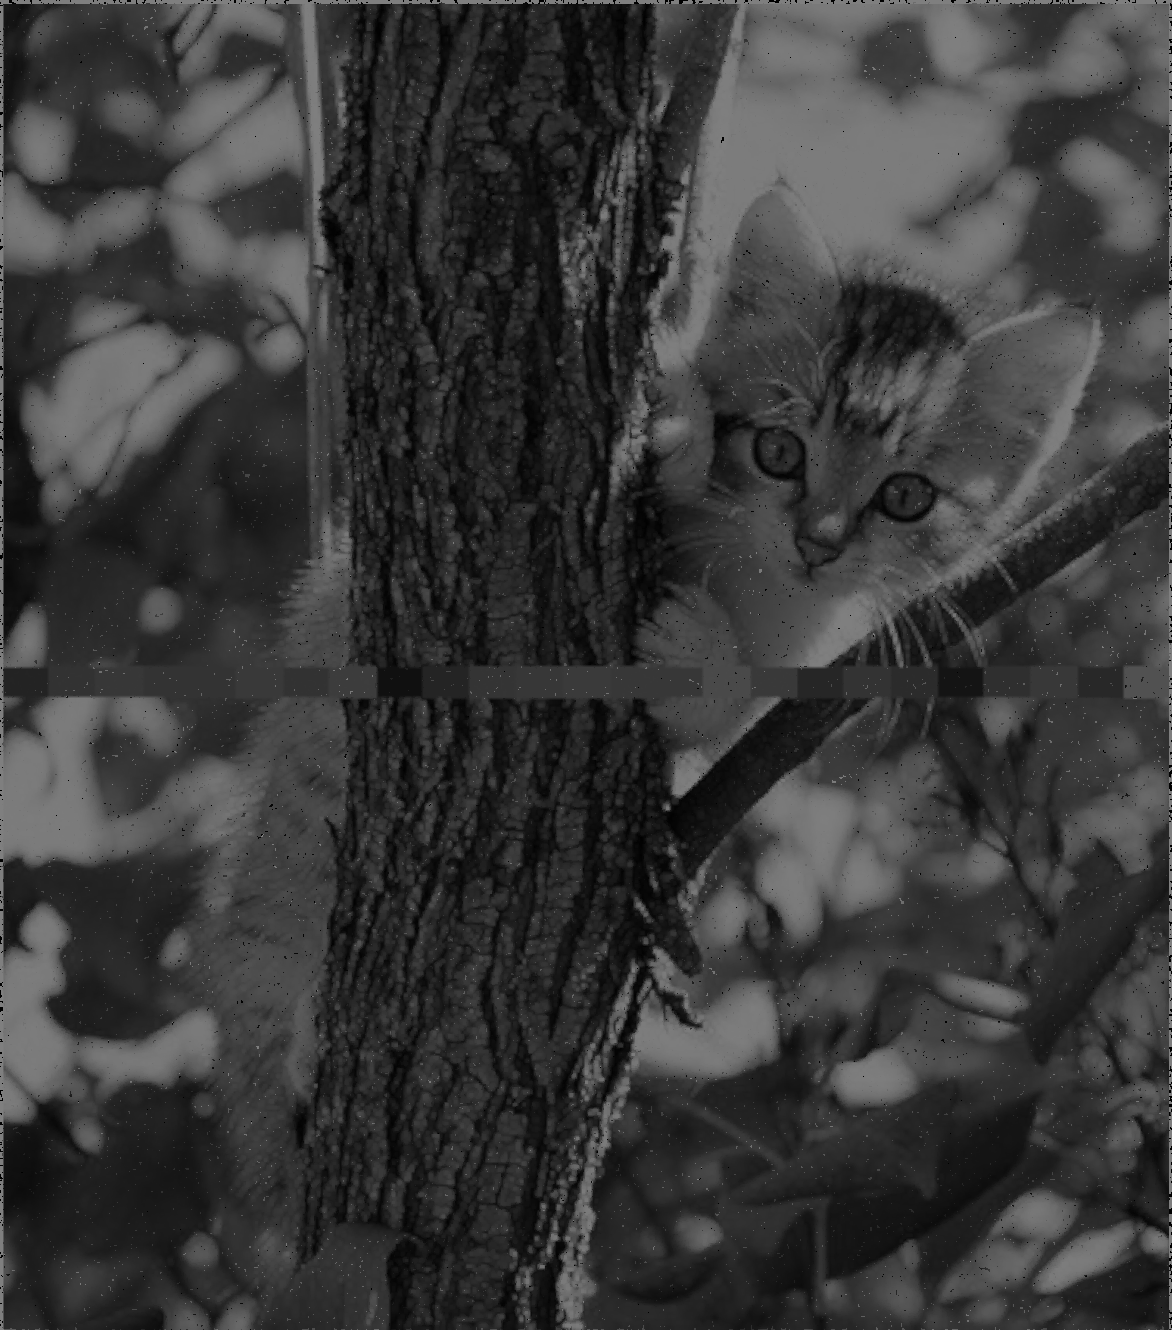

In [23]:
from scipy.ndimage import maximum_filter, minimum_filter

def midpoint(img):
    maxf = maximum_filter(img, (3, 3))
    minf = minimum_filter(img, (3, 3))
    midpoint = (maxf + minf) / 2
    cv2_imshow(midpoint)

print("\n\n---Effects of Midpoint Filter---\n\n")
midpoint(sp_05)

Better choice than the arithmetic filter, but still it does not recover the original image completely.

3. Contraharmonic Mean Filter



--- Effects of the Contraharmonic Filter ---




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


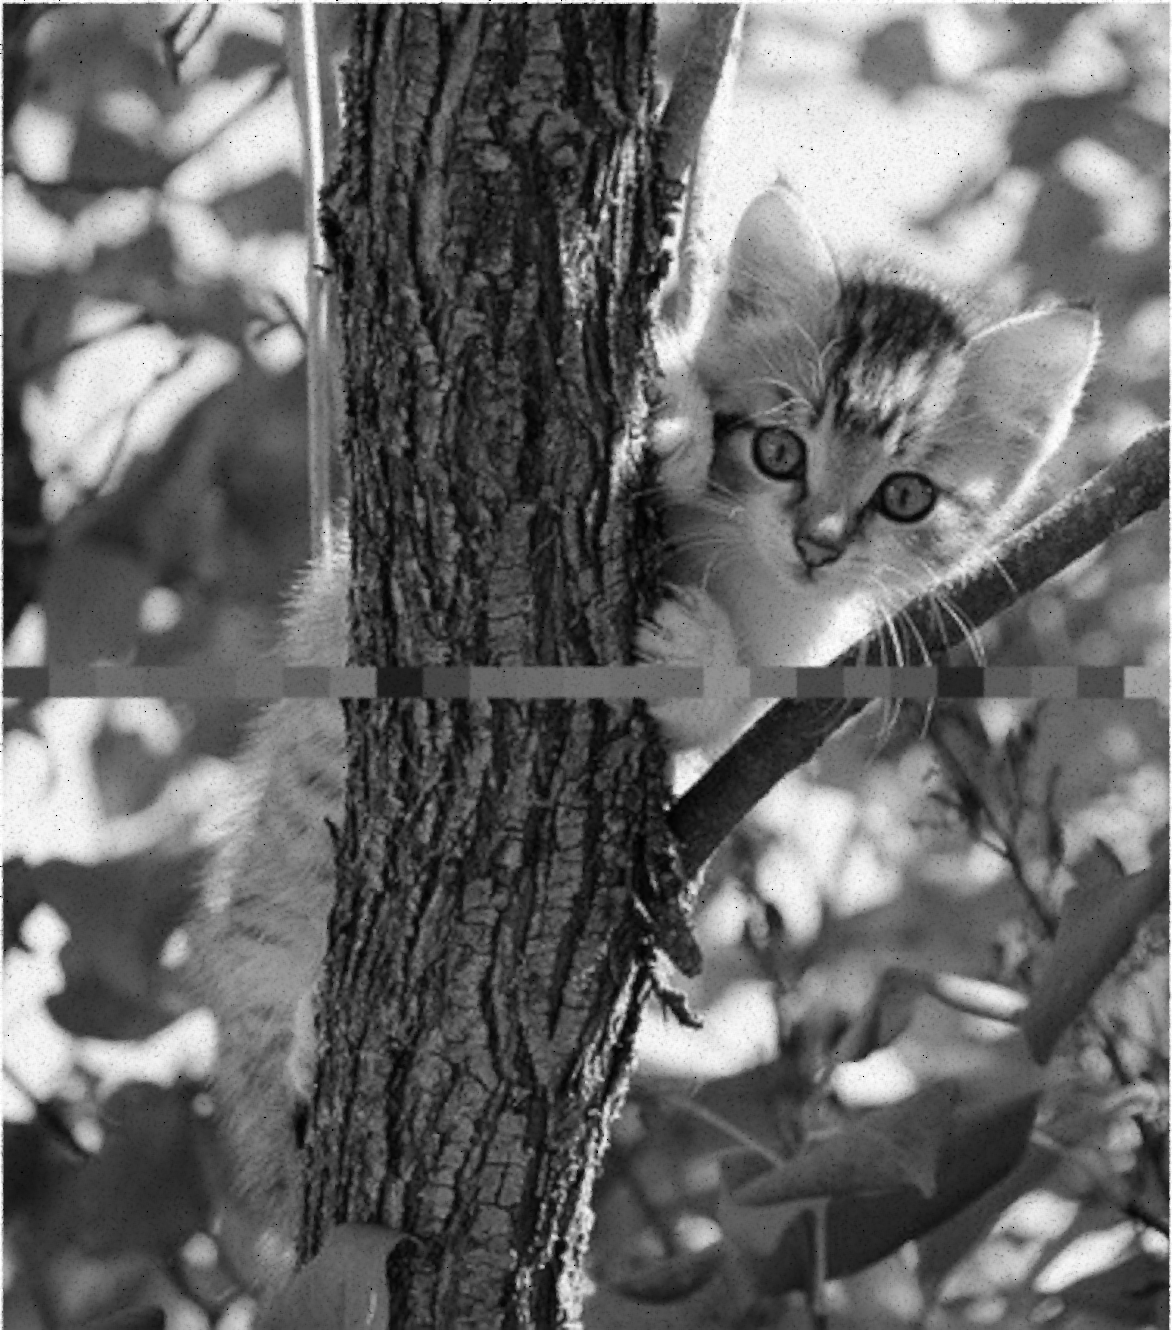

In [25]:
def contraharmonic_mean(img, size, Q):
    num = np.power(img, Q + 1)
    denom = np.power(img, Q)
    kernel = np.full(size, 1.0)
    result = cv.filter2D(num, -1, kernel) / cv.filter2D(denom, -1, kernel)
    return result

print("\n\n--- Effects of the Contraharmonic Filter ---\n\n")
cv2_imshow(contraharmonic_mean(sp_05, (3,3), 0.5))

**Conclusion**

Upon comparision with the initial grayscale image, we can conclude the final, contraharmonic, filter is the most effective in dealing with the salt and pepper noise. 